<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/visualization_of_mnist_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2652 - accuracy: 0.9236
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1079 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0703 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0508 - accuracy: 0.9849
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9815
테스트 정확도: 0.9815000295639038


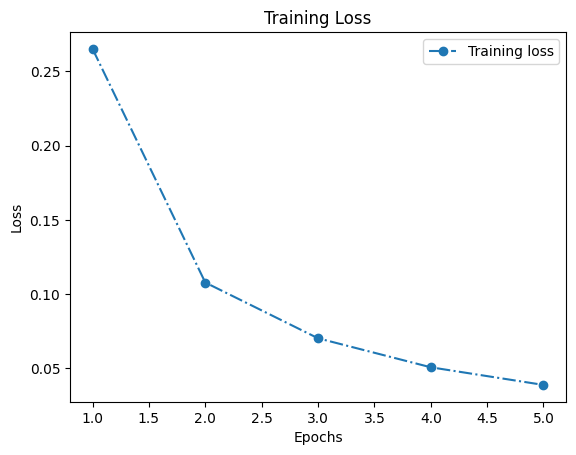

In [2]:
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

train_images = train_images.reshape((60000, 28, 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28))
test_images = test_images.astype("float32") / 255

history = model.fit(train_images, train_labels, epochs=5, batch_size=128)

test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"테스트 정확도: {test_acc}")

# 손실 그래프 시각화 (점선 스타일로)
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, '-.', label='Training loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
